In [72]:
#!/usr/bin/env python
# coding: utf-8

# # Understanding the data

# id: unique identifier
# 
# gender: "Male", "Female" or "Other"
# 
# age: age of the patient
# 
# hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
# 
# heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
# 
# ever_married: "No" or "Yes"
# 
# work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
# 
# Residence_type: "Rural" or "Urban"
# 
# avg_glucose_level: average glucose level in blood
# 
# bmi: body mass index
# 
# smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
# 
# stroke: 1 if the patient had a stroke or 0 if not
# 
# Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# # Importing Packages



In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

In [74]:
# # Data Cleaning

In [75]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [76]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0


In [77]:
type(df)

pandas.core.frame.DataFrame

In [78]:
list(df.keys())

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [79]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [80]:
# #### Checking for null values in dataset

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [82]:
# Categorical : gender, ever_married, work_type, residence_type, smoking_status
# 
# Numerical : age, hypertension, heart_disease, avg_glucose_level, bmi
# 
# hypertension & heart_disease have int dtypes, but we can check out that they are in categorical style

In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [84]:
# #### Body mass index (BMI) is defined as person's weight measurement into proportion to his/her weight. In other words, it is obtained by dividing the person's weight by the square of his/her height. BMI = body weight (kg) / (height(m) x height(m))

In [85]:
df["bmi"].fillna(df["bmi"].median(), inplace=True)

In [86]:
# #### Fill in NA in BMI column with the median.

In [87]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [88]:
df = df.drop("id", axis=1)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0


In [89]:
##### Identify the unique elements in gender column for encoding. 

In [90]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [91]:
#We only have 1 "other" gender so we can remove it 

In [92]:
df = df[df.gender != 'Other']

In [93]:
df=pd.get_dummies(df,columns=["gender"])

In [94]:
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male
0,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0,1,0
1,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0,0,1
2,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0,0,1
3,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0,0,1
4,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,No,Private,Rural,96.98,21.5,never smoked,0,1,0
5106,82.00,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0,0,1
5107,82.00,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0,1,0
5108,82.00,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0,1,0


In [95]:
set(df.ever_married)

{'No', 'Yes'}

In [96]:
df.ever_married.value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [97]:
df=pd.get_dummies(df,columns=["ever_married"])

In [98]:
df

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes
0,0.08,0,0,children,Urban,139.67,14.1,Unknown,0,1,0,1,0
1,0.08,0,0,children,Rural,70.33,16.9,Unknown,0,0,1,1,0
2,0.16,0,0,children,Urban,114.71,17.4,Unknown,0,0,1,1,0
3,0.16,0,0,children,Rural,69.79,13.0,Unknown,0,0,1,1,0
4,0.16,0,0,children,Urban,109.52,13.9,Unknown,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,Private,Rural,96.98,21.5,never smoked,0,1,0,1,0
5106,82.00,0,0,Private,Urban,217.57,33.5,formerly smoked,0,0,1,0,1
5107,82.00,0,0,Self-employed,Urban,113.45,30.3,never smoked,0,1,0,0,1
5108,82.00,0,0,Self-employed,Rural,211.58,36.9,never smoked,0,1,0,0,1


In [99]:
set(df.work_type)

{'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'}

In [100]:
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [101]:
df=pd.get_dummies(df,columns=["work_type"])

In [102]:
df

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.08,0,0,Urban,139.67,14.1,Unknown,0,1,0,1,0,0,0,0,0,1
1,0.08,0,0,Rural,70.33,16.9,Unknown,0,0,1,1,0,0,0,0,0,1
2,0.16,0,0,Urban,114.71,17.4,Unknown,0,0,1,1,0,0,0,0,0,1
3,0.16,0,0,Rural,69.79,13.0,Unknown,0,0,1,1,0,0,0,0,0,1
4,0.16,0,0,Urban,109.52,13.9,Unknown,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,Rural,96.98,21.5,never smoked,0,1,0,1,0,0,0,1,0,0
5106,82.00,0,0,Urban,217.57,33.5,formerly smoked,0,0,1,0,1,0,0,1,0,0
5107,82.00,0,0,Urban,113.45,30.3,never smoked,0,1,0,0,1,0,0,0,1,0
5108,82.00,0,0,Rural,211.58,36.9,never smoked,0,1,0,0,1,0,0,0,1,0


In [103]:
set(df.Residence_type)

{'Rural', 'Urban'}

In [104]:
df.Residence_type.value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [105]:
df=pd.get_dummies(df,columns=["Residence_type"])

In [106]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0.08,0,0,139.67,14.1,Unknown,0,1,0,1,0,0,0,0,0,1,0,1
1,0.08,0,0,70.33,16.9,Unknown,0,0,1,1,0,0,0,0,0,1,1,0
2,0.16,0,0,114.71,17.4,Unknown,0,0,1,1,0,0,0,0,0,1,0,1
3,0.16,0,0,69.79,13.0,Unknown,0,0,1,1,0,0,0,0,0,1,1,0
4,0.16,0,0,109.52,13.9,Unknown,0,0,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,96.98,21.5,never smoked,0,1,0,1,0,0,0,1,0,0,1,0
5106,82.00,0,0,217.57,33.5,formerly smoked,0,0,1,0,1,0,0,1,0,0,0,1
5107,82.00,0,0,113.45,30.3,never smoked,0,1,0,0,1,0,0,0,1,0,0,1
5108,82.00,0,0,211.58,36.9,never smoked,0,1,0,0,1,0,0,0,1,0,1,0


In [107]:
set(df.smoking_status)

{'Unknown', 'formerly smoked', 'never smoked', 'smokes'}

In [108]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [109]:
df=pd.get_dummies(df,columns=["smoking_status"])

In [110]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.08,0,0,139.67,14.1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
1,0.08,0,0,70.33,16.9,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0.16,0,0,114.71,17.4,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
3,0.16,0,0,69.79,13.0,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
4,0.16,0,0,109.52,13.9,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,96.98,21.5,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5106,82.00,0,0,217.57,33.5,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
5107,82.00,0,0,113.45,30.3,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5108,82.00,0,0,211.58,36.9,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   hypertension                    5109 non-null   int64  
 2   heart_disease                   5109 non-null   int64  
 3   avg_glucose_level               5109 non-null   float64
 4   bmi                             5109 non-null   float64
 5   stroke                          5109 non-null   int64  
 6   gender_Female                   5109 non-null   uint8  
 7   gender_Male                     5109 non-null   uint8  
 8   ever_married_No                 5109 non-null   uint8  
 9   ever_married_Yes                5109 non-null   uint8  
 10  work_type_Govt_job              5109 non-null   uint8  
 11  work_type_Never_worked          5109 non-null   uint8  
 12  work_type_Private               51

In [112]:
df.shape

# ### Correlation

(5109, 21)

<AxesSubplot:>

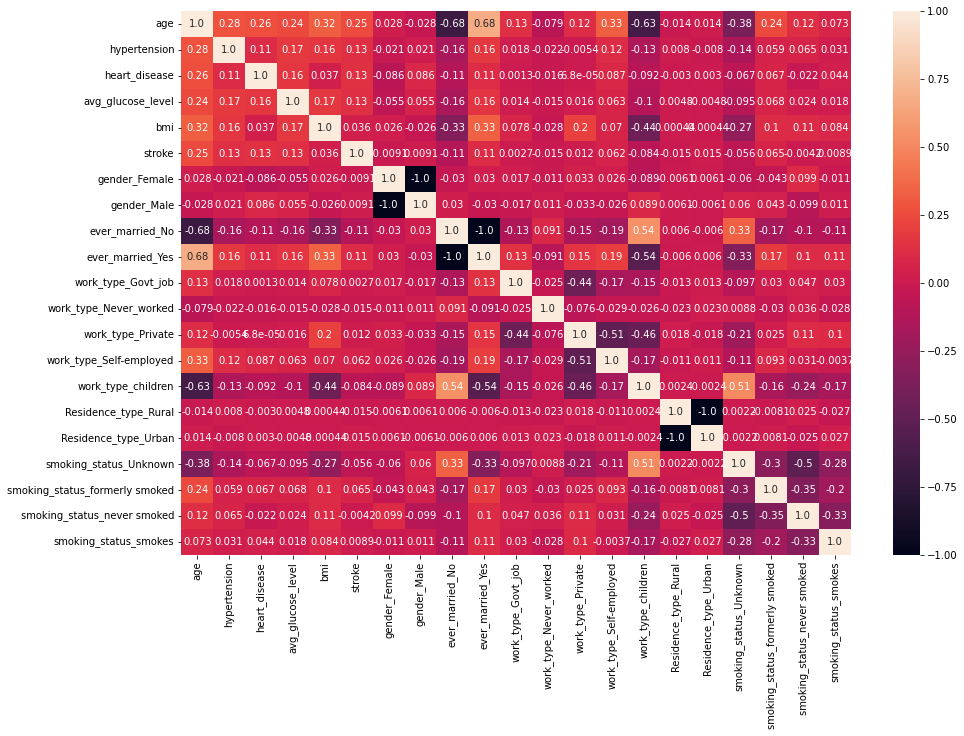

In [113]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

In [114]:
# ### Finding what features have more correlation with stroke

In [115]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(df.drop('stroke',axis=1),df['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
0,age,326.799849
2,heart_disease,94.666779
3,avg_glucose_level,90.550026
1,hypertension,84.919947
8,ever_married_Yes,60.609558
7,ever_married_No,60.609558
13,work_type_children,36.194030
17,smoking_status_formerly smoked,21.456849
12,work_type_Self-employed,19.803145
16,smoking_status_Unknown,16.021938


In [116]:
important_cols=fscores[fscores['Score']>50]['Attribute']
print(important_cols)

0                  age
1         hypertension
2        heart_disease
3    avg_glucose_level
7      ever_married_No
8     ever_married_Yes
Name: Attribute, dtype: object


In [117]:
# # Normalization

In [118]:
#look at normalization again. 
from sklearn.preprocessing import MinMaxScaler

In [119]:
#normalization range between 0-1
scaler=MinMaxScaler(copy=True, feature_range=(0,1))
x = scaler.fit_transform(df)

In [120]:
# # Separate the Target Column from the Rest of the Dataset

In [121]:
#drop the y (target) column from the dataset
x=df.drop("stroke",axis=1)

In [122]:
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.08,0,0,139.67,14.1,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0
1,0.08,0,0,70.33,16.9,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
2,0.16,0,0,114.71,17.4,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0
3,0.16,0,0,69.79,13.0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
4,0.16,0,0,109.52,13.9,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,96.98,21.5,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
5106,82.00,0,0,217.57,33.5,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
5107,82.00,0,0,113.45,30.3,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5108,82.00,0,0,211.58,36.9,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [123]:
x.shape

(5109, 20)

In [124]:
y=df.stroke

In [125]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

In [126]:
print('x\n', x[:10])
print('y\n', y[:10])

x
     age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Female  \
0  0.08             0              0             139.67  14.1              1   
1  0.08             0              0              70.33  16.9              0   
2  0.16             0              0             114.71  17.4              0   
3  0.16             0              0              69.79  13.0              0   
4  0.16             0              0             109.52  13.9              0   
5  0.24             0              0             118.87  16.3              0   
6  0.24             0              0             146.97  18.5              0   
7  0.24             0              0              58.35  18.6              0   
8  0.24             0              0              89.28  14.2              0   
9  0.24             0              0              57.09  19.4              0   

   gender_Male  ever_married_No  ever_married_Yes  work_type_Govt_job  \
0            0                1            

In [127]:
# # Separate the Data into Train and Test Sets

from sklearn.model_selection import train_test_split

In [128]:
#change the dataframe just with important features(coloumn) to stroke
x=df[important_cols]

In [129]:
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [130]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,ever_married_No,ever_married_Yes
4000,63.0,0,0,196.81,0,1
3576,57.0,0,0,64.37,0,1
3033,51.0,1,0,106.22,1,0
1868,35.0,0,0,83.27,0,1
494,10.0,0,0,97.24,1,0
...,...,...,...,...,...,...
4427,71.0,0,0,144.23,0,1
466,9.0,0,0,150.00,1,0
3093,52.0,0,0,107.29,0,1
3773,60.0,0,0,85.60,0,1


In [131]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [132]:
# ## Balancing Data Set with Smote function
# 
# conda install -c conda-forge imbalanced-learn

In [133]:
#SMOTE for Imbalanced Classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_resampled, y_resampled  = oversample.fit_resample(X_train, y_train)

In [134]:
X_train, y_train = X_resampled, y_resampled
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7290, 6) (1278, 6) (7290,) (1278,)


In [135]:
    
from scipy import stats

#global functions
def bootstrap_samples(X_train,y_train):
    n_samples = X_train.shape[0]
    #make random choice between 0 and the number of samples
    inxs = np.random.choice(n_samples, size = n_samples, replace = True)
    return X_train[inxs], y_train[inxs]
    



class RandomForest:
    def __init__(self, n_trees=100, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        #stores the trees
        self.trees = []
        
    
        
       
    def fit(self, X_train, y_train):
        self.trees = []
        #use decision tree to create trees. for loop to create multiple trees
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split = self.min_samples_split,
                                max_depth = self.max_depth, 
                                n_feats = self.n_feats)
            X_train_sample, y_train_sample = bootstrap_samples(X_train, y_train)
            tree.dtfit(X_train_sample, y_train_sample)
            self.trees.append(tree)
            
            
    def predict(self, X_test):
        tree_preds = np.array([tree.predict(X_test) for tree in self.trees])
        #swap axis to get majority load
        #[[1111] [0000] [1111]]
        #[[101] [101] [101] [101]]
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        
        #predict most common label with in each tree
        y_pred = [_most_common_label_RF(tree_preds) for tree_pred in tree_preds]
        return np.array(y_pred)
    
    #counts labels and returns most common
    def _most_common_label_RF(self, tree_preds):
        most_common = stats.mode(tree_preds)[0][0]
        return most_common
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        #stores information of a node
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    #
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    #stopping criteria
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

#takes X_train and y_train and begins to fit the tree
    def dtfit(self, X_train, y_train):
        self.n_feats = X_train.shape[1] if not self.n_feats else min(self.n_feats, X_train.shape[1])
        self.root = self._grow_tree(X_train, y_train)

    def predict(self, X_test):
        return np.array([self._traverse_tree(x, self.root) for x in X_test])

    def _grow_tree(self, X_train, y_train, depth=0):
        n_samples, n_features = X_train.shape
        n_labels = len(np.unique(y_train))

        # stopping criteria
        #checking for max depth
        #checking if there is only 1 class present
        #if samples are less than the minimun samples split
        if (
            
            depth >= self.max_depth            
            or n_labels == 1            
            or n_samples < self.min_samples_split
        ):
            #if any of those criteria happens return value of the leaf node in line 21
            leaf_value = self._most_common_label(y_train)
            return Node(value=leaf_value)
        #if we don't meet stopping criteria
        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedy search
        best_feat, best_thresh = self._best_criteria(X_train, y_train, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X_train[:, best_feat], best_thresh)
        #continue growing left node
        left = self._grow_tree(X_train[left_idxs, :], y_train[left_idxs], depth + 1)
        #continue growing right node
        right = self._grow_tree(X_train[right_idxs, :], y_train[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X_train, y_train, feat_idxs):
        best_gain = -1
        #create split index and threshold
        split_idx, split_thresh = None, None
        
        for feat_idx in feat_idxs:
            #collects all samples of feat_idx
            X_column = X_train[:, feat_idx]
            #makes sure to only go over unique thresholds
            thresholds = np.unique(X_column)
            #go through all possible thresholds
            for threshold in thresholds:
                #calculate information gain
                gain = self._information_gain(y_train, X_column, threshold)
                #
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y_train, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y_train)

        #create our split left and right indxs
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        #imediately return info gain = 0 if any of indx are empty
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        #compute the weighted avgerage of the child entropy
        num_samples = len(y_train)
        num_samples_left, num_samples_right = len(left_idxs), len(right_idxs)
        entropy_left, entropy_right = entropy(y_train[left_idxs]), entropy(y_train[right_idxs])
        child_entropy = (num_samples_left / num_samples) * entropy_left + (num_samples_right / num_samples) * entropy_right

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        #ask question if left indx less than or equal to split_treshold
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        #ask question if right indx greater than split_treshold
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
    #counts labels and returns most common
    def _most_common_label_RF(self, y_train):
        most_common = stats.mode(y_train)[0][0]
        return most_common
  

In [1]:
import time
start_time = time.time()
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    
    
    
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
   
    

clf = RandomForest(n_trees = 3)
clf.fit(X_train.values, y_train.values)

y_pred = clf.predict(X_test.values)
acc = accuracy(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Accuracy:", acc)
print("--- %s seconds ---" % (time.time() - start_time))
    


NameError: name 'RandomForest' is not defined

In [ ]:
#cited sources
#https://www.youtube.com/watch?v=Oq1cKjR8hNo
#https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/random_forest.py
#https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/decision_tree.py